In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime as dt
from pandas.core.common import flatten
import matplotlib.pyplot as plt

data = pd.read_csv("cluster4zhvi.csv", index_col="City")
data.drop(data.columns[0], axis=1, inplace=True)

data.

,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
count,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,...,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01
mean,3.699929e+05,3.711772e+05,3.724415e+05,3.742176e+05,3.760489e+05,3.779098e+05,3.793901e+05,3.812786e+05,3.830921e+05,3.852914e+05,...,4.601915e+05,4.613421e+05,4.626811e+05,4.638252e+05,4.646075e+05,4.653116e+05,4.659883e+05,4.670794e+05,4.684118e+05,4.704981e+05
std,3.201629e+05,3.196929e+05,3.192318e+05,3.195441e+05,3.206372e+05,3.220735e+05,3.230566e+05,3.244897e+05,3.258702e+05,3.278581e+05,...,3.805089e+05,3.812870e+05,3.826681e+05,3.843914e+05,3.860480e+05,3.870422e+05,3.869372e+05,3.866730e+05,3.869636e+05,3.885407e+05
min,4.400400e+04,4.421500e+04,4.426200e+04,4.445100e+04,4.457400e+04,4.514900e+04,4.550900e+04,4.590600e+04,4.593200e+04,4.597400e+04,...,5.430000e+04,5.402700e+04,5.379300e+04,5.363100e+04,5.378200e+04,5.392900e+04,5.405800e+04,5.403700e+04,5.423600e+04,5.447500e+04
25%,1.874080e+05,1.886070e+05,1.902305e+05,1.930580e+05,1.954785e+05,1.977340e+05,1.981340e+05,1.994685e+05,2.011530e+05,2.035480e+05,...,2.508535e+05,2.517955e+05,2.524220e+05,2.530890e+05,2.530840e+05,2.522300e+05,2.517630e+05,2.522265e+05,2.529105e+05,2.544140e+05
50%,2.827470e+05,2.813980e+05,2.840670e+05,2.865860e+05,2.904170e+05,2.947380e+05,2.974090e+05,3.002490e+05,3.028110e+05,3.058620e+05,...,3.518530e+05,3.509410e+05,3.498010e+05,3.493870e+05,3.483130e+05,3.506150e+05,3.541550e+05,3.587350e+05,3.632880e+05,3.680940e+05
75%,4.078990e+05,4.097605e+05,4.126215e+05,4.163245e+05,4.181185e+05,4.189540e+05,4.201080e+05,4.230755e+05,4.266820e+05,4.317040e+05,...,5.453750e+05,5.456835e+05,5.455575e+05,5.451805e+05,5.440455e+05,5.425995e+05,5.411990e+05,5.416835e+05,5.426465e+05,5.433405e+05
max,1.841094e+06,1.830132e+06,1.816077e+06,1.808497e+06,1.808753e+06,1.812265e+06,1.811703e+06,1.816375e+06,1.825136e+06,1.837393e+06,...,2.183946e+06,2.189284e+06,2.203454e+06,2.220850e+06,2.235951e+06,2.240267e+06,2.228271e+06,2.214959e+06,2.207181e+06,2.213976e+06


In [46]:
data_t = data.transpose().copy()


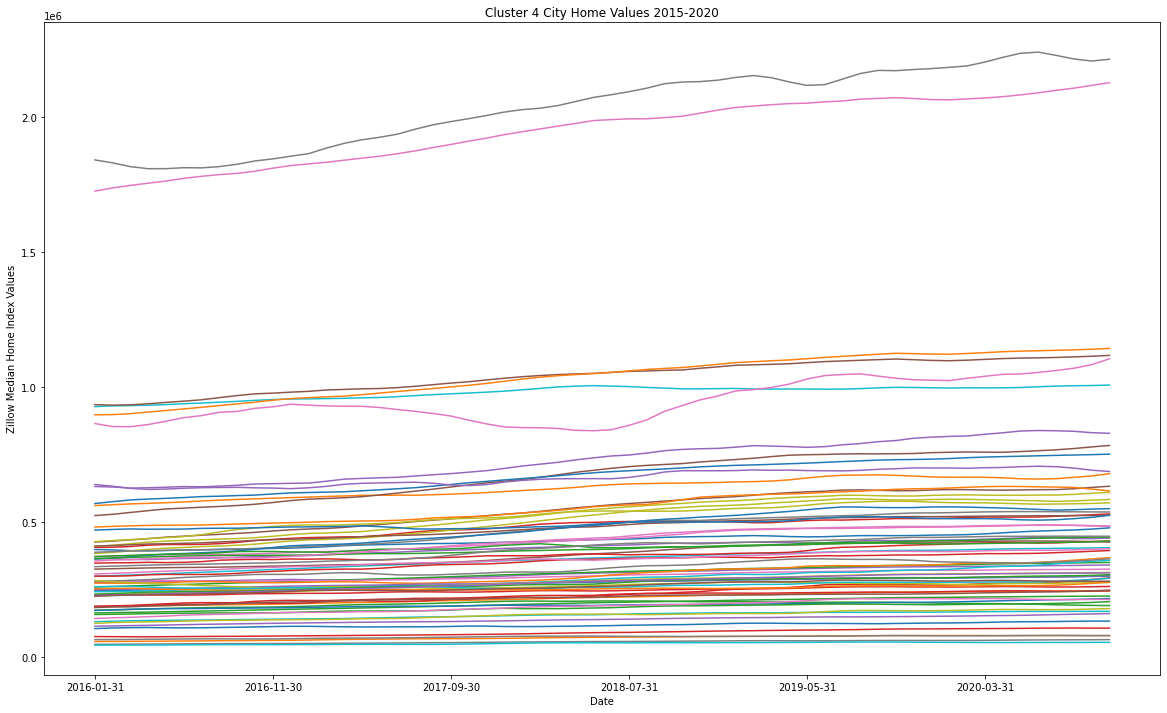

In [51]:
data_t.plot(kind='line', figsize=(20, 12), legend=None) # pass a tuple (x, y) size



plt.title('Cluster 4 City Home Values 2015-2020')
plt.ylabel('Zillow Median Home Index Values')
plt.xlabel('Date')
plt.savefig('Images/Cluster4.png')

In [26]:
dates = data.stack()
dates.name = 'date'
xx = dates.reset_index()

d = {'city': xx.iloc[:,0].values, 'date': xx.iloc[:,1].values, 'price': xx.iloc[:,2].values}
data2 = pd.DataFrame(data=d)

data2.head()



,city,date,price
0,Montrose,2016-01-31,245491.0
1,Montrose,2016-02-29,246607.0
2,Montrose,2016-03-31,247718.0
3,Montrose,2016-04-30,248871.0
4,Montrose,2016-05-31,250000.0


In [19]:
data2.head()

,city,date,price
0,Montrose,2016-01-31,245491.0
1,Montrose,2016-02-29,246607.0
2,Montrose,2016-03-31,247718.0
3,Montrose,2016-04-30,248871.0
4,Montrose,2016-05-31,250000.0


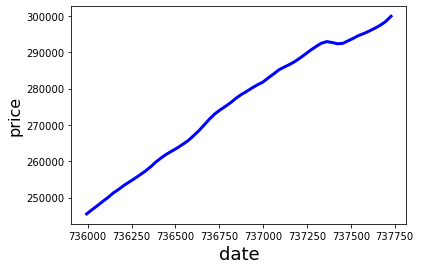

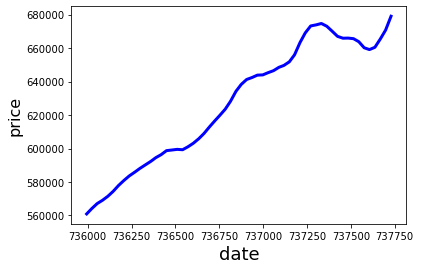

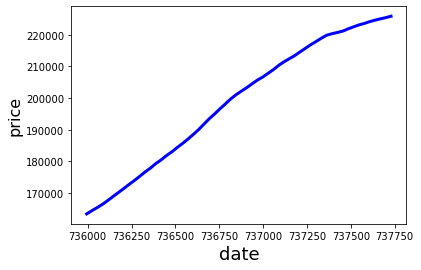

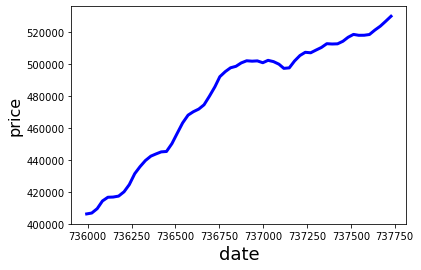

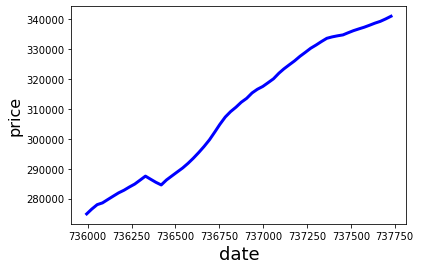

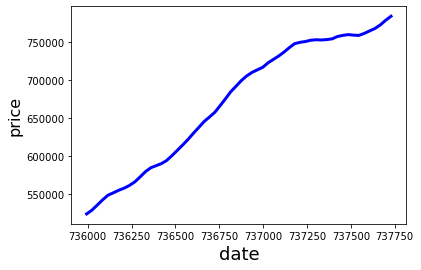

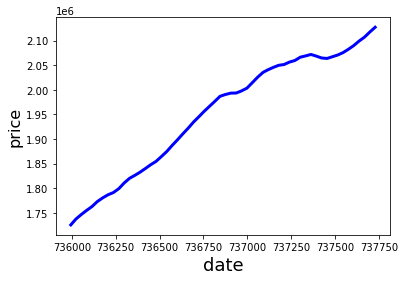

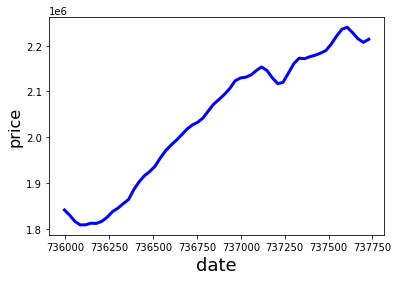

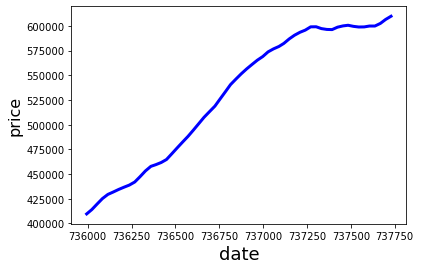

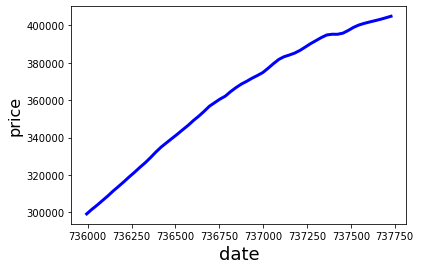

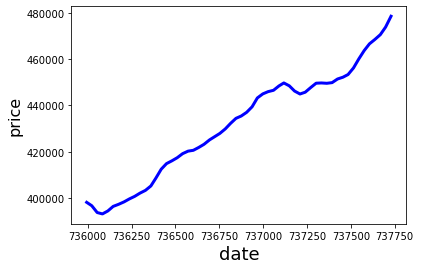

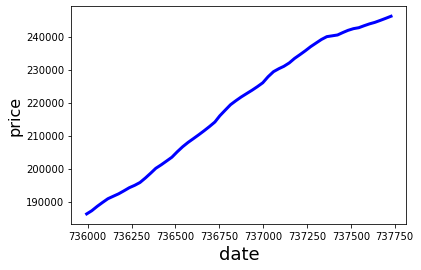

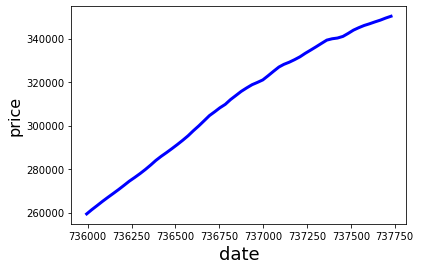

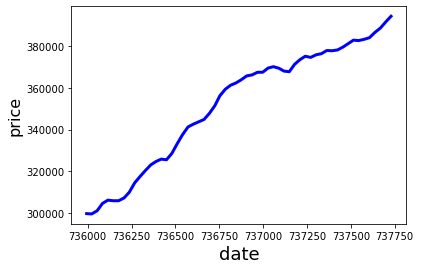

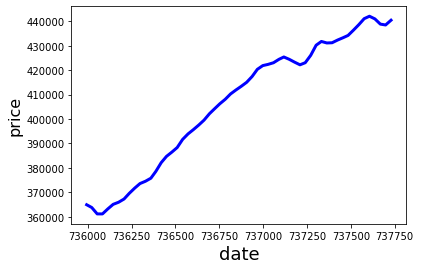

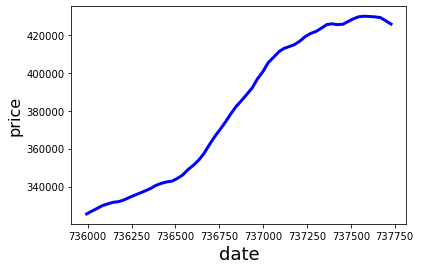

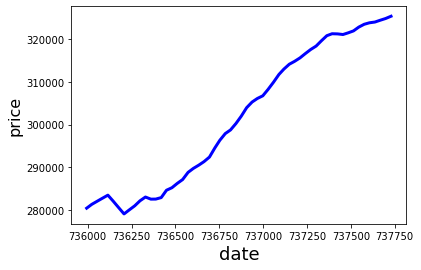

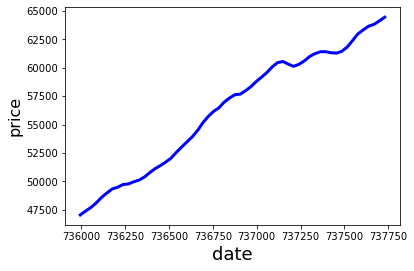

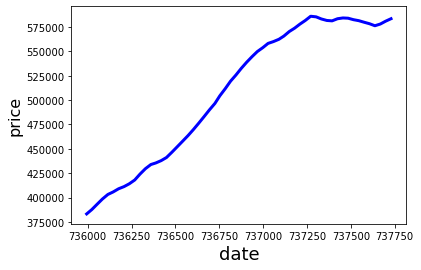

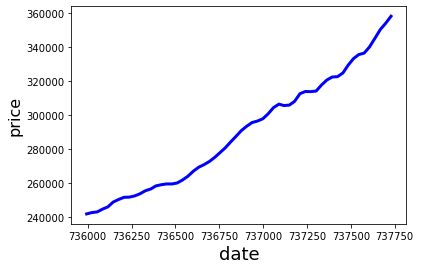

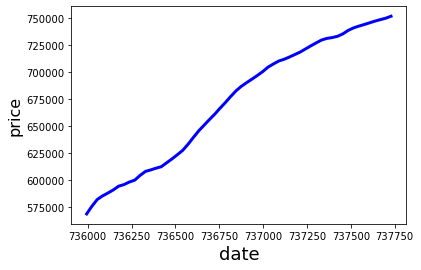

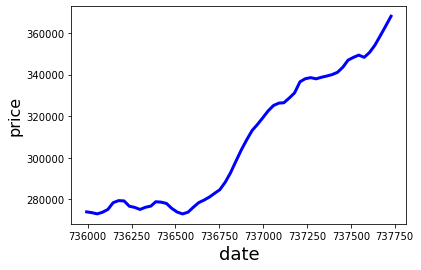

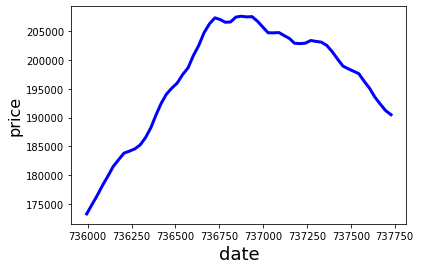

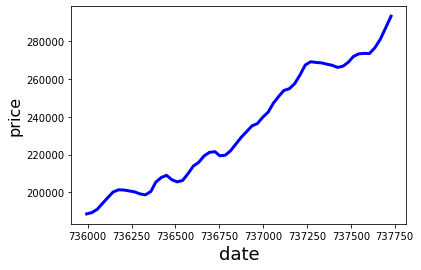

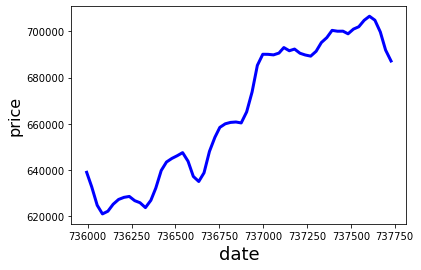

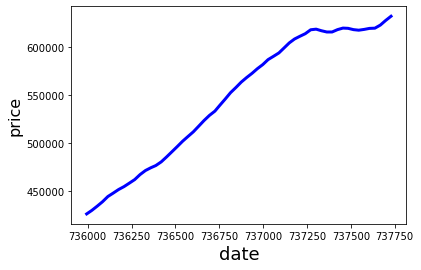

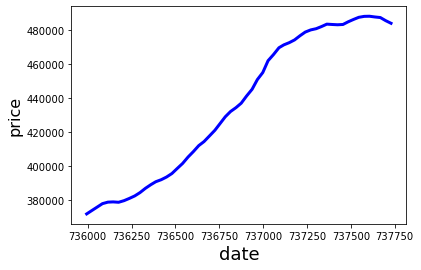

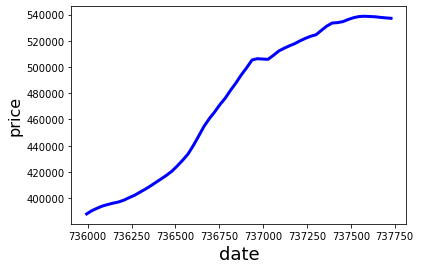

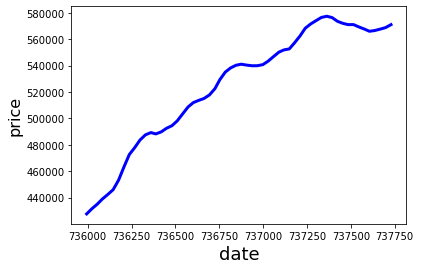

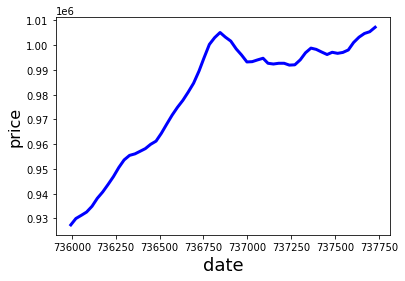

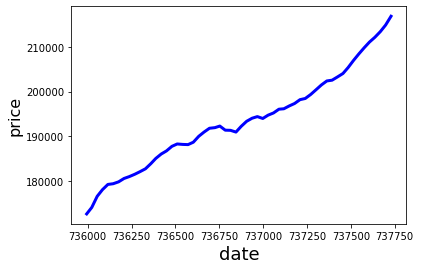

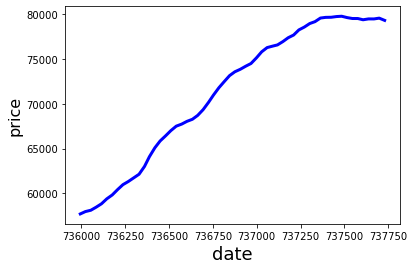

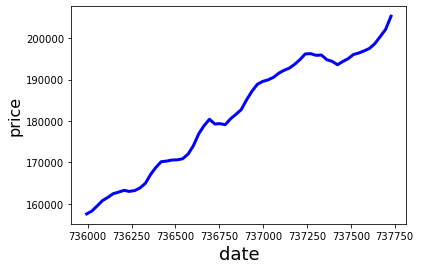

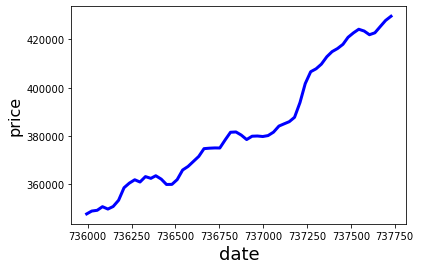

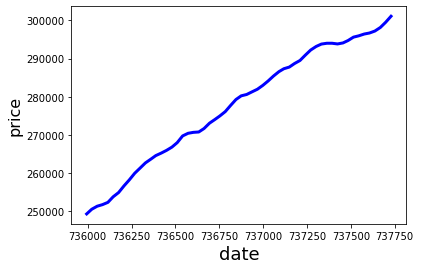

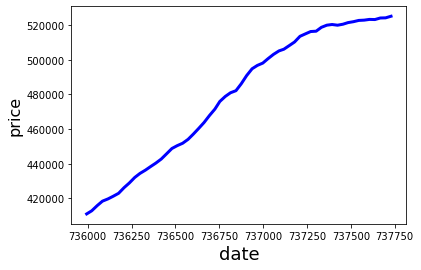

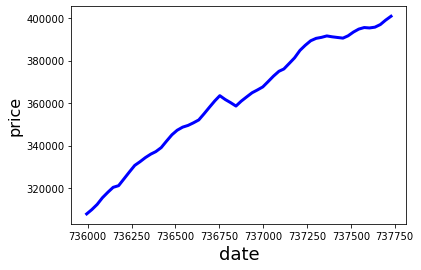

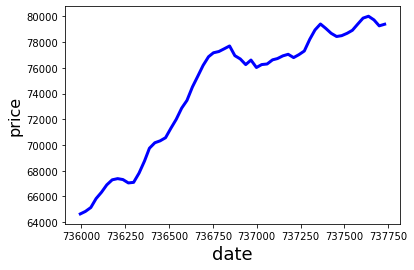

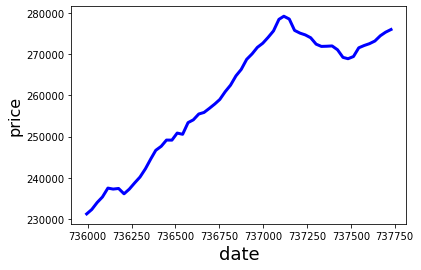

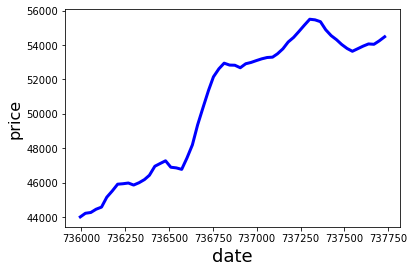

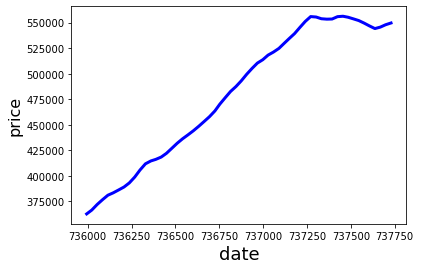

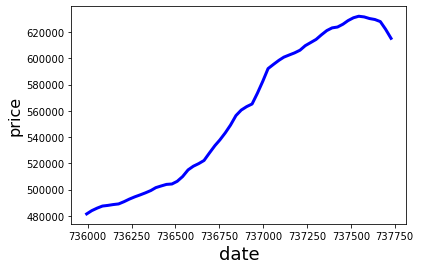

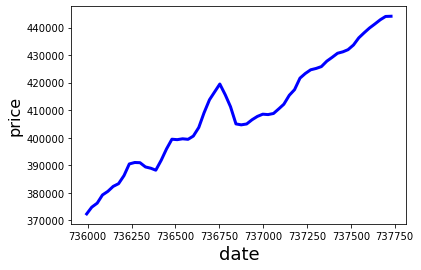

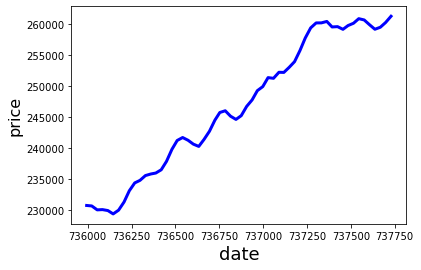

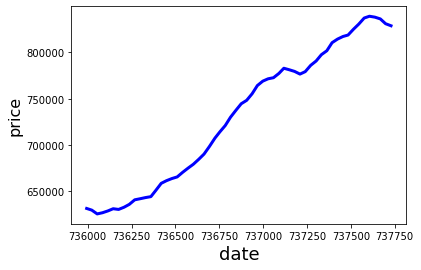

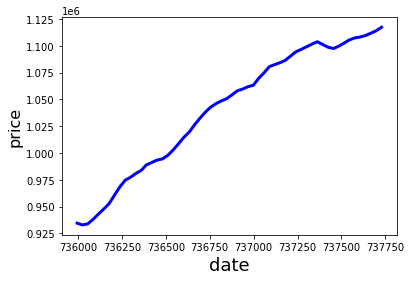

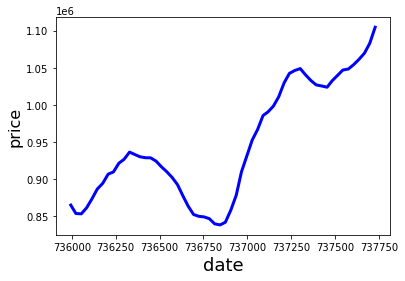

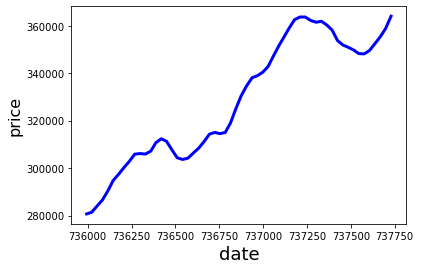

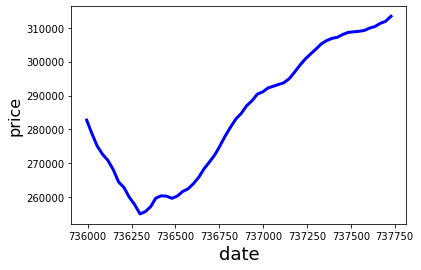

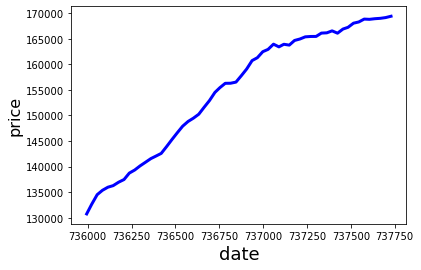

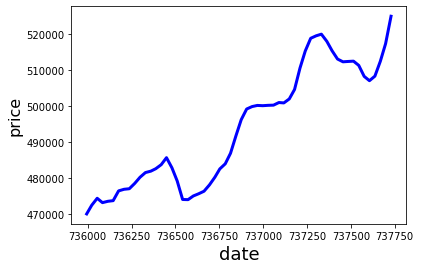

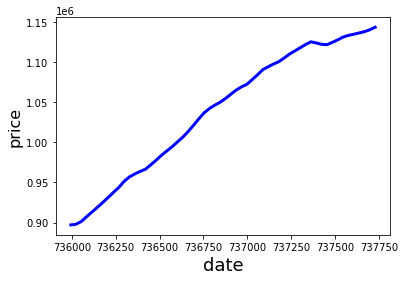

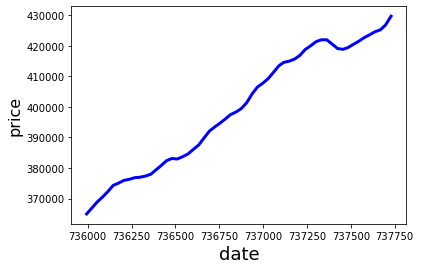

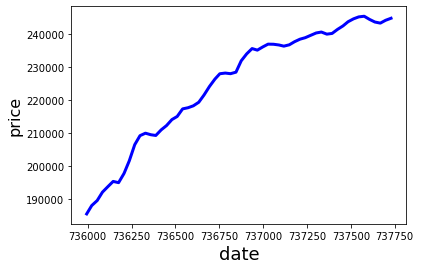

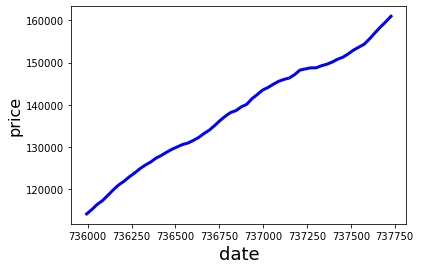

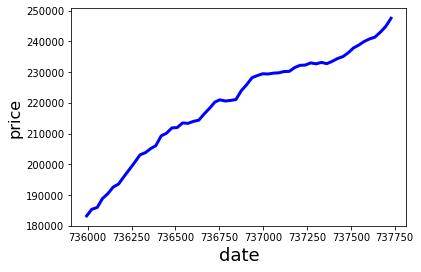

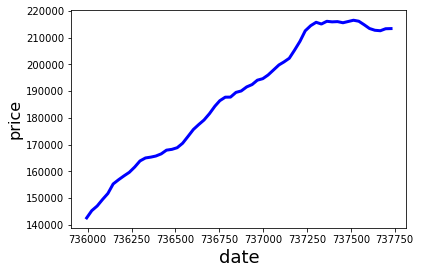

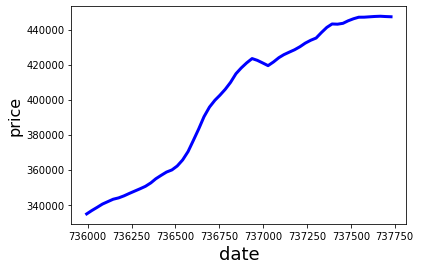

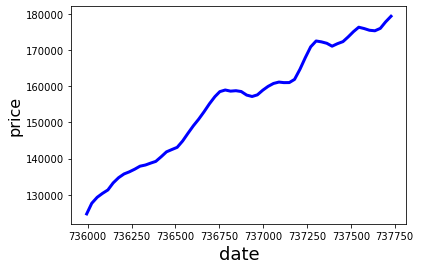

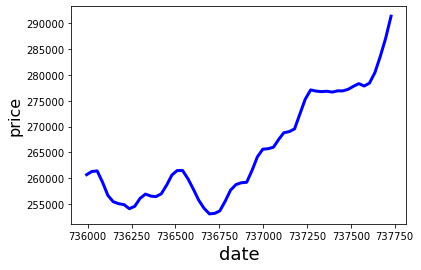

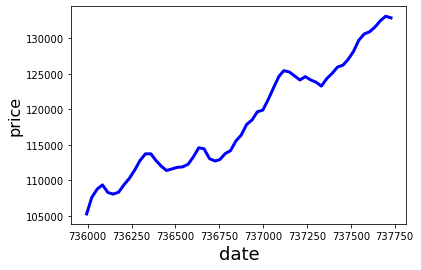

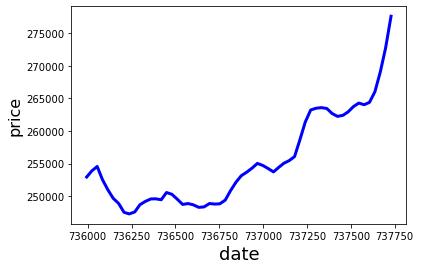

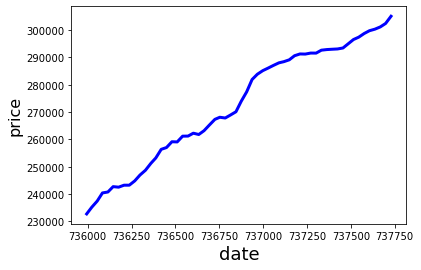

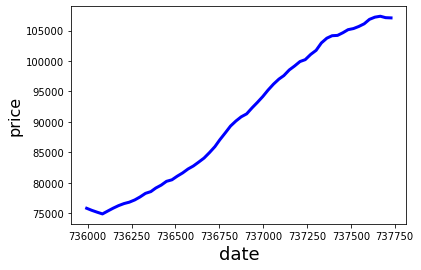

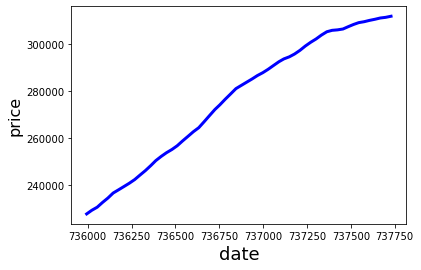

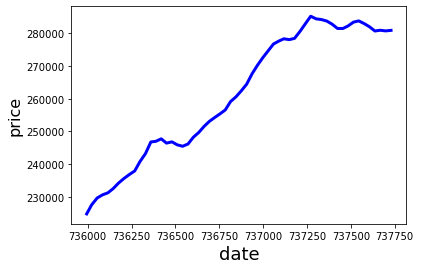

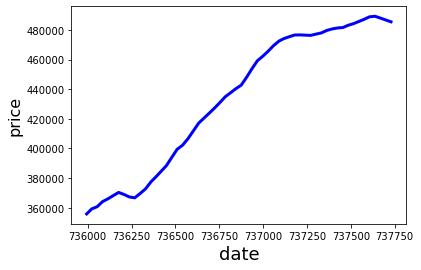

In [27]:
# convert datetime to numeric for linear regression to work
dates_org = data2['date']
data2["date_org"] = dates_org
data2['date'] = pd.to_datetime(data2['date'])
data2['date'] = data2['date'].map(dt.datetime.toordinal)

cities = data2.city.unique()

city_coef = []
city_inter = []
prediction_res = []
predict_date = ["2020-12-31"]

for i in cities:
    df = data2.loc[data2["city"] == i,:]
    Y = df.price.values
    X = df[["date"]].values
    reg = LinearRegression().fit(X, Y)
    city_coef.append(reg.coef_)
    city_inter.append(reg.intercept_)
    x_new = pd.to_datetime(predict_date)
    x_new = x_new.map(dt.datetime.toordinal)
    pred = reg.predict(x_new[0].reshape(-1, 1))
    prediction_res.append(pred)
    plt.plot(X, Y, color="blue", linewidth=3)
    # plt.xticks(range(len(df["date_org"].values)), df["date_org"].values, size='small')
    plt.xlabel('date', fontsize=18)
    plt.ylabel('price', fontsize=16)
    plt.show()
    #plt.savefig(f'{i}.png')


results = {'city': cities, 'coefficient': list(flatten(city_coef)) , 'intercept': city_inter, "predicted": list(flatten(prediction_res))}
results_df = pd.DataFrame(data=results)
results_df.to_csv("~/Desktop/results.csv")



In [29]:
pd.set_option('display.max_rows', None)
results_df.sort_values('coefficient', ascending=False)

,city,coefficient,intercept,predicted
7,Vail,274.394165,-2.001515e+08,2.293788e+06
6,Aspen,229.768914,-1.673559e+08,2.165321e+06
5,Breckenridge,158.949257,-1.164512e+08,8.199435e+05
51,Telluride,152.524625,-1.113504e+08,1.180750e+06
44,Minturn,142.332089,-1.041486e+08,8.625500e+05
18,Keystone,133.034046,-9.751883e+07,6.323591e+05
25,Frisco,129.659520,-9.499435e+07,6.671468e+05
8,Silverthorne,127.494125,-9.341593e+07,6.479613e+05
40,Dillon,124.517163,-9.127194e+07,5.955793e+05
46,Red Cliff,124.185048,-9.055971e+07,1.062774e+06


In [32]:
targets = results_df[['city', 'coefficient']]
targets

,city,coefficient
0,Montrose,31.928432
1,Steamboat Springs,68.842817
2,Fort Morgan,38.923680
3,Glenwood Springs,70.519288
4,Pagosa Springs,42.315808
5,Breckenridge,158.949257
6,Aspen,229.768914
7,Vail,274.394165
8,Silverthorne,127.494125
9,Salida,62.759198


In [33]:
targets.set_index(city)

NameError: name 'city' is not defined